# Modeling Video Game Popularity

In the previous notebook we looked at several data sets, to determine threshold values and ways to determine popularity. After noting which datasets lacked sufficient information and what datasets we could combine, we have settled on 3 sets to model with. The main one we will be looking at is the 2019 Steam Tag data, the other two will be for personal curiosity to see if we get significantly different results. These two additional sets will be the 2019 Video Game Sales data and the Merged data set of the two previously mentioned.

#### Things to note that have been done:

- Dropped columns that were not independent variables (Ie. an individual does not have control over these when designing the game) other than the variable we chose to determine popularity (Rating).
- Created dummy variables of categorical values
- Train_test_split:
 - We chose our dependent variable to be categorical of Popularity, which is determined by if a game achieved more than 70% rating
 
#### What we will be doing in this notebook: 

Selecting a model that works best to predict the popularity of a game, and thus informing us as to what features are most important to have in our games. We will be looking at Logistic Regression, K-Nearest Neighbors, Support vector Machines, and Random Forests.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve

import warnings
warnings.filterwarnings('ignore')

## Loading Training data: steam tags

In [2]:
x_train = pd.read_csv("C:/Users/book_/OneDrive/Documents/GitHub/Capstone2-Video-Game-Popularity/preprocessed_data/x_steam_train.csv", index_col=0)
y_train = pd.read_csv("C:/Users/book_/OneDrive/Documents/GitHub/Capstone2-Video-Game-Popularity/preprocessed_data/y_steam_train.csv", index_col=0)

x_test = pd.read_csv("C:/Users/book_/OneDrive/Documents/GitHub/Capstone2-Video-Game-Popularity/preprocessed_data/x_steam_test.csv", index_col=0)
y_test = pd.read_csv("C:/Users/book_/OneDrive/Documents/GitHub/Capstone2-Video-Game-Popularity/preprocessed_data/y_steam_test.csv", index_col=0)


In [54]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,1466,1467,1468,1469,1470,1471,1472,1473,1474,1475
0,0.138571,-0.147856,-0.076303,0.312259,0.274696,-0.014531,-0.007265,-0.010274,-0.063876,-0.030835,...,-0.021799,-0.025173,-0.026202,-0.019224,-0.021799,-0.022978,-0.021799,-0.017797,-0.020552,-0.025173
1,0.138571,-0.147856,0.197700,-0.058560,-0.566183,-0.014531,-0.007265,-0.010274,-0.063876,-0.030835,...,-0.021799,-0.025173,-0.026202,-0.019224,-0.021799,-0.022978,-0.021799,-0.017797,-0.020552,-0.025173
2,0.138571,-0.147856,-0.129335,0.045902,-0.666587,-0.014531,-0.007265,-0.010274,-0.063876,-0.030835,...,-0.021799,-0.025173,-0.026202,-0.019224,-0.021799,-0.022978,-0.021799,-0.017797,-0.020552,-0.025173
3,0.138571,-0.147856,-0.067464,-0.058560,-0.264973,-0.014531,-0.007265,-0.010274,-0.063876,-0.030835,...,-0.021799,-0.025173,-0.026202,-0.019224,-0.021799,-0.022978,-0.021799,-0.017797,-0.020552,-0.025173
4,0.138571,-0.147856,-0.129335,-0.058560,-0.264973,-0.014531,-0.007265,-0.010274,-0.063876,-0.030835,...,-0.021799,-0.025173,-0.026202,-0.019224,-0.021799,-0.022978,-0.021799,-0.017797,-0.020552,-0.025173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18944,0.138571,-0.147856,-0.129335,-0.058560,2.119610,-0.014531,-0.007265,-0.010274,-0.063876,-0.030835,...,-0.021799,-0.025173,-0.026202,-0.019224,-0.021799,-0.022978,-0.021799,-0.017797,-0.020552,-0.025173
18945,0.138571,-0.147856,-0.129335,-0.058560,0.663759,-0.014531,-0.007265,-0.010274,-0.063876,-0.030835,...,-0.021799,-0.025173,-0.026202,-0.019224,-0.021799,-0.022978,-0.021799,-0.017797,-0.020552,-0.025173
18946,0.138571,-0.147856,-0.129335,-0.058560,1.680345,-0.014531,-0.007265,-0.010274,-0.063876,-0.030835,...,-0.021799,-0.025173,-0.026202,-0.019224,-0.021799,-0.022978,-0.021799,-0.017797,-0.020552,-0.025173
18947,0.138571,-0.147856,0.020924,-0.058560,1.115575,-0.014531,-0.007265,-0.010274,-0.063876,-0.030835,...,-0.021799,-0.025173,-0.026202,-0.019224,-0.021799,-0.022978,-0.021799,-0.017797,-0.020552,-0.025173


In [3]:
print(x_train.shape)
print(y_train.shape)

(18949, 1476)
(18949, 1)


### I. Logistic Regression

In [4]:
C_param_range = [0.001,0.01,0.1,1,10,100]

table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
table['C_parameter'] = C_param_range


j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    Logreg = LogisticRegression(penalty = 'l2', C = i,random_state = 40)
    Logreg.fit(x_train,y_train)
    
    # Predict using model
    y_pred_lr = Logreg.predict(x_test)
    
    # Saving accuracy score in table
    table.iloc[j,1] = accuracy_score(y_test,y_pred_lr)
    j += 1
    
table

,C_parameter,Accuracy
0,0.001,0.666585
1,0.010,0.667446
2,0.100,0.666338
3,1.000,0.666215
4,10.000,0.666215
5,100.000,0.665969


In [5]:
from sklearn.metrics import confusion_matrix

cnf_matrix= confusion_matrix(y_test,y_pred_lr)
print(cnf_matrix)
Accuracy_lr=Logreg.score(x_test,y_test)

print(Accuracy_lr)

[[1291 1974]
 [ 739 4118]]
0.6659689731593204


Looks like our accuracy for a linear regression is 0.67 no matter what our parameter is set to.

In [6]:
from sklearn.model_selection import cross_val_score

cv_scores_test= cross_val_score(Logreg,x_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(Logreg,x_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_test_lr= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_lr))

[0.64096698 0.63661307 0.66638252 0.65459584 0.66361939]
Mean cross validation test score: 0.6524355593139284
Mean cross validation train score: 0.6894576642310113
Standard deviation in cv test scores: 0.011883955624493046


## II. K-Nearest Neighbor (KNN):

[[1546 1719]
 [1143 3714]]
0.6476237379955676


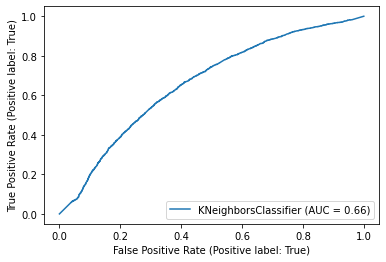

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_roc_curve

# Apply KNN model to training data:

knn = KNeighborsClassifier(p=2,weights='distance',n_neighbors=50)
knn.fit(x_train,y_train)

# Predict using model:

y_predict_knn=knn.predict(x_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_knn)
print(cnf_matrix)
Accuracy_knn=knn.score(x_test,y_test)

print(Accuracy_knn)
knn_disp= plot_roc_curve(knn,x_test,y_test)

In [8]:
cv_scores_test= cross_val_score(knn,x_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(knn,x_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_knn_test= cv_scores_test.mean()
cv_scores_knn_train= cv_scores_train.mean()
cv_scores_std_knn= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_knn_test))
print ('Mean cross validation train score: ' +str(cv_scores_knn_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_knn))

[0.6206516  0.59312196 0.62883814 0.62840049 0.64009176]
Mean cross validation test score: 0.6222207906356931
Mean cross validation train score: 0.6548701478214691
Standard deviation in cv scores: 0.015814889351761386


## III. Support Vector Machine (SVM):

In [9]:
from sklearn.svm import SVC

# svm = SVC(kernel='linear')
# svm.fit(x_train, y_train)

# # Predict using model:

# y_predict_svm=svm.predict(x_test)

# #Confusion matrix:

# cnf_matrix = confusion_matrix(y_test, y_predict_svm)
# print(cnf_matrix)

# Accuracy_svm=svm.score(x_test,y_test)
# print(Accuracy_svm)

In [10]:
# cv_scores_test= cross_val_score(svm,x_test,y_test,cv=5,scoring='roc_auc')
# cv_scores_train= cross_val_score(svm,x_train,y_train,cv=5,scoring='roc_auc')
# print(cv_scores_test)
# cv_scores_svm_test= cv_scores_test.mean()
# cv_scores_svm_train= cv_scores_train.mean()
# cv_scores_std_svm= cv_scores_test.std()
# print ('Mean cross validation test score: ' +str(cv_scores_svm_test))
# print ('Mean cross validation train score: ' +str(cv_scores_svm_train))
# print ('Standard deviation in cv scores: ' +str(cv_scores_std_svm))

The SMV cells took too long for my computer to run. Here is the Accuracy_smv results. The computer could not handle cross validation:

[[ 962 2303]

 [ 435 4422]]

0.6628909135680867

## IV. Random Forest:

In [11]:
from sklearn.ensemble import RandomForestClassifier

#Apply RF to the training data:

rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='entropy')
rf.fit(x_train, y_train)

#Predict using the model:

y_predict_rf = rf.predict(x_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_rf)
print(cnf_matrix)
Accuracy_rf=rf.score(x_test,y_test)
print(Accuracy_rf)

[[1635 1630]
 [1214 3643]]
0.6498399409012559


In [12]:
cv_scores_test= cross_val_score(rf,x_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(rf,x_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_rf))

[0.65708837 0.63542986 0.6555429  0.67185911 0.66867961]
Mean cross validation test score: 0.6577199696549736
Mean cross validation train score: 0.6763067739103452
Standard deviation in cv scores: 0.012821983874719467


## V. Naive Bayes:

In [13]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

#Predict using the model:

y_predict_nb=nb.predict(x_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_nb)
print(cnf_matrix)
Accuracy_nb=nb.score(x_test,y_test)
print(Accuracy_nb)

[[3071  194]
 [4073  784]]
0.4746367889682344


In [18]:
cv_scores_test= cross_val_score(nb,x_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(nb,x_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_nb_test= cv_scores_test.mean()
cv_scores_nb_train= cv_scores_train.mean()
cv_scores_std_nb= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_nb_test))
print ('Mean cross validation train score: ' +str(cv_scores_nb_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_nb))

[0.55213276 0.55103779 0.54970169 0.55035383 0.54818054]
Mean cross validation test score: 0.5502813220861744
Mean cross validation train score: 0.5623072057801483
Standard deviation in cv scores: 0.0013232222382786043


## VI. Gradient Boost:

In [27]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
gbc = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05 , n_estimators=160, random_state=5, max_depth=9, max_leaf_nodes=100)
gbc.fit(x_train, y_train)

#Predict using the model:

y_predict_gbc = gbc.predict(x_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_gbc)
print(cnf_matrix)
Accuracy_gbc=gbc.score(x_test,y_test)
print(Accuracy_gbc)

[[1374 1891]
 [ 784 4073]]
0.6706476237379956


In [28]:
cv_scores_test= cross_val_score(gbc,x_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(gbc,x_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_gbc_test= cv_scores_test.mean()
cv_scores_gbc_train= cv_scores_train.mean()
cv_scores_std_gbc= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_gbc_test))
print ('Mean cross validation train score: ' +str(cv_scores_gbc_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_gbc))

[0.7020187  0.66794598 0.68066186 0.69374415 0.69809151]
Mean cross validation test score: 0.6884924409927227
Mean cross validation train score: 0.7100009013149764
Standard deviation in cv scores: 0.012539198265478597


Taken from the mean cross validation score:

- Logistic Regression: 0.6524
- K-Nearest Neighbors: 0.6222
- Random Forest: 0.6577
- Naive Bayes: 0.5503
- Gradient Boost: 0.6885

## Model comparison:

In [34]:
myLabels = [ 'Logistic Regression','KNN','Random Forest', 'Naive Bayes', 'Gradient Boost']
score_test= [  cv_scores_lr_test,cv_scores_knn_test,cv_scores_rf_test,cv_scores_nb_test, cv_scores_gbc_test]
score_train= [  cv_scores_lr_train,cv_scores_knn_train,cv_scores_rf_train,cv_scores_nb_train, cv_scores_gbc_train]
Accuracy_score = [Accuracy_lr,Accuracy_knn,Accuracy_rf,Accuracy_nb, Accuracy_gbc]

score_tab_acc = pd.DataFrame(list(zip(myLabels, Accuracy_score)), 
               columns =['Algorithm', 'Model accuracy score']) 

score_tab = pd.DataFrame(list(zip(myLabels, score_train, score_test)), 
               columns =['Algorithm', 'ROC-AUC train score', 'ROC-AUC test score' ]) 
print(score_tab_acc)

score_tab

             Algorithm  Model accuracy score
0  Logistic Regression              0.665969
1                  KNN              0.647624
2        Random Forest              0.649840
3          Naive Bayes              0.474637
4       Gradient Boost              0.670648


,Algorithm,ROC-AUC train score,ROC-AUC test score
0,Logistic Regression,0.689458,0.652436
1,KNN,0.654870,0.622221
2,Random Forest,0.676307,0.657720
3,Naive Bayes,0.562307,0.550281
4,Gradient Boost,0.710001,0.688492


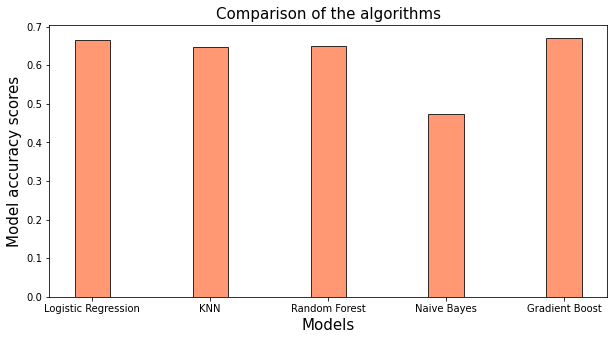

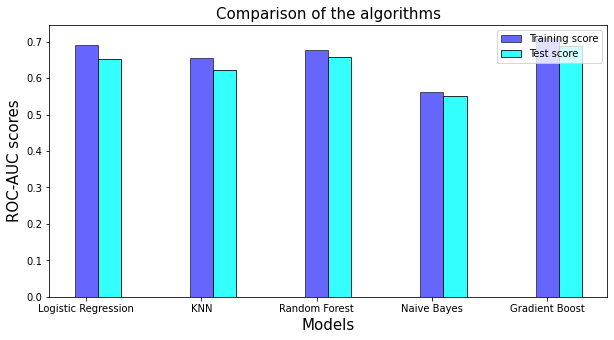

In [35]:
#plotting the accuracy scores:


index=[1,2,3,4,5]
index_acc=[1,2,3,4,5]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Model accuracy scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
#patterns = [ "/"]
_=plt.bar(index_acc,Accuracy_score,color='coral',alpha=0.8,label='Accuracy score',edgecolor='k',width=0.3)
plt.xticks([1, 2,3,4, 5], myLabels)
#plt.legend()
plt.savefig("26.png")
plt.show()

#plotting and comparing ROC-AUC train/test scores:

index=[1,2,3,4,5]
index_acc=[1.2,2.2,3.2,4.2, 5.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('ROC-AUC scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
_=plt.bar(index,score_train,color='b',alpha=0.6,label='Training score',edgecolor='k',width=0.2)
_=plt.bar(index_acc,score_test,color='cyan',alpha=0.8,label='Test score',edgecolor='k',width=0.2)
plt.xticks([1, 2,3,4,5], myLabels)
plt.legend()
plt.savefig("27.png")
plt.show()

Our two best performing models are Random Forest and Gradient Boost (Gradient Boost being the better of the two). So lets work on fine tuning them:

## Hyperparameter Tuning using Grid search CV:

### Random Forest:

In [29]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(max_features='auto',random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10,12,16], "n_estimators": [50, 100,400,700,1000]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(x_train, y_train)

print(gs.best_estimator_) 
print(gs.best_score_)

RandomForestClassifier(min_samples_split=16, n_estimators=1000, n_jobs=-1,
                       random_state=1)
0.6673706504648885


In [37]:

rf = RandomForestClassifier(min_samples_split=16, n_estimators=1000, n_jobs=-1,
                       random_state=1)
rf.fit(x_train, y_train)
y_predictions_rf = rf.predict(x_test)
acc = accuracy_score(y_test, y_predictions_rf)
cv = cross_val_score(rf, x_test, y_test,scoring='roc_auc').mean()
print(acc)
print(cv)

0.6679389312977099
0.6967684652708985


In [49]:
imps

array([6.89559251e-03, 7.72597501e-03, 1.31722621e-01, ...,
       1.19841806e-04, 2.77703310e-04, 2.07132944e-04])

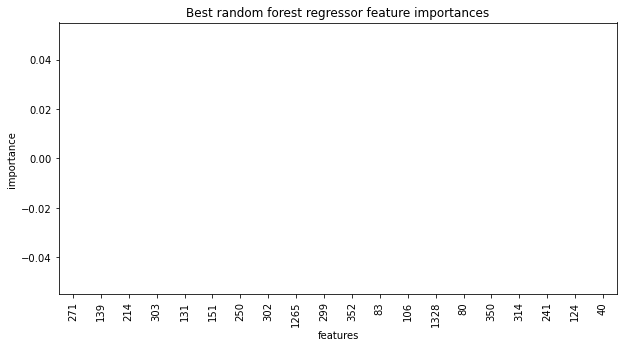

In [52]:
plt.subplots(figsize=(10, 5))
imps = rf.feature_importances_
rf_feat_imps = pd.Series(imps, index=x_train.columns).sort_values(ascending=False)
rf_feat_imps[-20:].plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

     Features  Importance scores
0           0           0.000000
1           1           0.000000
2           2           0.000000
3           3           0.000000
4           4           0.000000
...       ...                ...
1471     1471           0.017350
1472     1472           0.027313
1473     1473           0.062047
1474     1474           0.128981
1475     1475           0.131723

[1476 rows x 2 columns]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

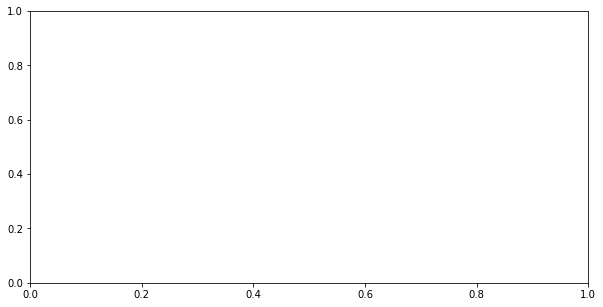

In [38]:
#Feature importances:

features = x_train.columns
importances = list(rf.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(x_train,imp)),columns =['Features', 'Importance scores']) 
print(tab)

#Visual comparison:
plt.figure(figsize=(10,5))
#indices = np.argsort(importances)
index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
_=plt.barh(index,imp, align='center',color='b')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Random Forest classifier model',fontsize=15)
plt.savefig("28.png")
plt.show()
len(importances)


In [45]:
rf.feature_importances_

array([6.89559251e-03, 7.72597501e-03, 1.31722621e-01, ...,
       1.19841806e-04, 2.77703310e-04, 2.07132944e-04])

In [ ]:

from sklearn.metrics import auc, roc_curve, roc_auc_score
y_scores_rf = rf.predict_proba(x_test)
y_scores_rf = y_scores_rf[:,1]
auroc = roc_auc_score(y_test, y_scores_rf)
print("ROC-AUC Score:", auroc)

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores_rf)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (RF)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("30.png")
plt.show()